**Connect google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Total 15851 (delta 0), reused 0 (delta 0), pack-reused 15851
Receiving objects: 100% (15851/15851), 14.37 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (10683/10683), done.


# 새 섹션

**2) Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: un

**3) Configure Darknet network for training YOLO V3**

In [ ]:
#!cp cfg/yolov3.cfg cfg/yolov3_training.cfg
!cp /content/drive/MyDrive/yolov3/data/yolov3_testing_re.cfg cfg/yolov3_training.cfg

In [ ]:
!echo -e '' > data/obj.names
!echo -e '' > data/obj.data
!cp /content/drive/MyDrive/yolov3/data/obj.names data/obj.names
!cp /content/drive/MyDrive/yolov3/data/obj.data data/obj.data
!mkdir data/obj

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2024-07-01 02:35:00--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  11.1MB/s    in 16s     

2024-07-01 02:35:17 (9.69 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
import zipfile
import os

def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for zip_info in zip_ref.infolist():
            # 파일명을 cp437에서 cp949로 디코딩
            zip_info.filename = zip_info.filename.encode('cp437').decode('cp949')
            zip_ref.extract(zip_info, extract_to)

# ZIP 파일 경로
zip_path = '/content/drive/MyDrive/yolov3/images.zip'
# 추출할 디렉토리
extract_to = 'data/obj'

# ZIP 파일 추출
extract_zip(zip_path, extract_to)

print("압축 해제가 완료되었습니다.")

압축 해제가 완료되었습니다.


In [ ]:
import glob
images_list = glob.glob("data/obj/val_dataset/*.JPG")
print(len(images_list)) # 4551

4551


In [ ]:
#Create training.txt file
file = open("data/train2.txt", "w")
file.write("\n".join(images_list))
file.close()

In [ ]:
count = 0
length = len(images_list) #4551
txt = open('data/train2.txt','r')
i = 0
f = open('data/train.txt','w')
f2 = open('data/test.txt','w')

while True :
    if i == 0 :
        line = txt.readline()
        if not line :
            break
        count +=1
        if count < int(length/10)*2 :
            f2.write(line)
        else :
            f.write(line)

txt.close()
f.close()
f2.close()

**6) Start the training**

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 | tee /content/drive/MyDrive/yolov3/train.log

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.893239), count: 14, class_loss = 0.004625, iou_loss = 0.126318, total_loss = 0.130943 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.828166), count: 4, class_loss = 0.141785, iou_loss = 0.129790, total_loss = 0.271575 
 total_bbox = 2998747, rewritten_bbox = 4.130292 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.894241), count: 17, class_loss = 0.153894, iou_loss = 0.080071, total_loss = 0.233965 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.896394), count: 20, class_loss = 0.020178, iou_loss = 0.135284, total_loss = 0.155462 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.869748), count: 2, class_loss = 0.000056, iou_loss = 0.010643, total_loss = 0.010699 
 total_bbox = 2998786, rewritten_bbox = 4.130271 % 
v3 (mse loss, N

# Loss 그래프

35714it [00:00, 1795590.87it/s]
100%|██████████| 10200/10200 [00:00<00:00, 639662.40it/s]


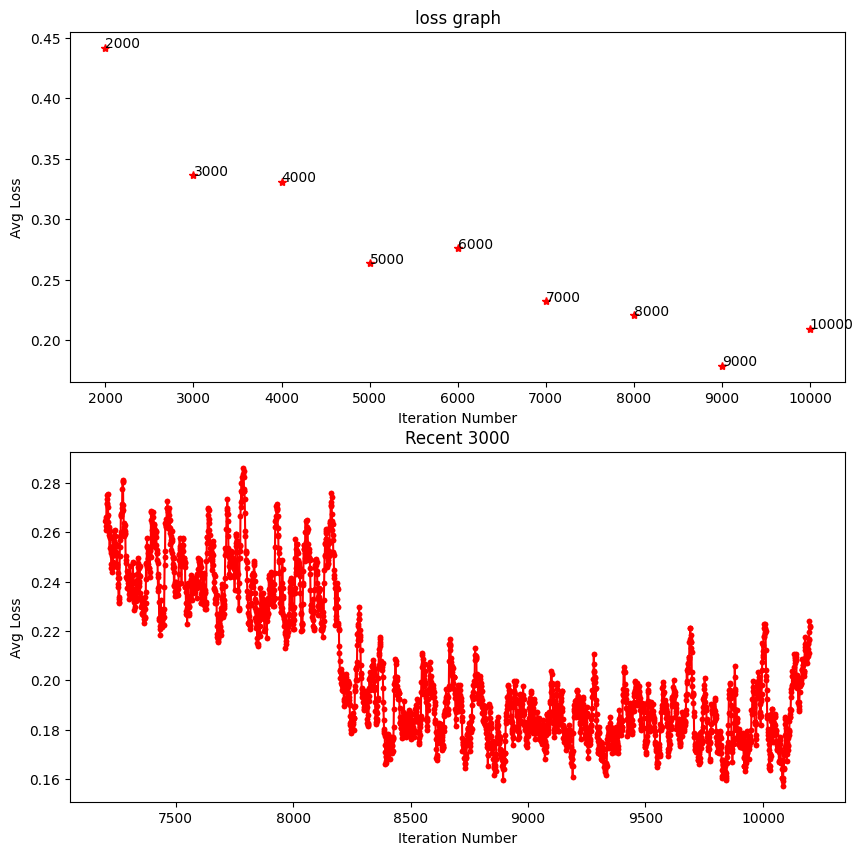

In [ ]:
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm

lines = []
for line in tqdm(open('/content/drive/MyDrive/yolov3/train.log')):
    if "avg" in line:
        lines.append(line)

iterations = []
avg_loss = []
line_cnt=len(lines)

for i in tqdm(range(line_cnt)):
    lineParts = lines[i].split(',')
    iterations.append(int(lineParts[0].split(':')[0]))
    avg_loss.append(float(lineParts[1].split()[0]))

fig ,ax  = plt.subplots(2,1 , figsize = (10,10))

#start = 0
start = 1999


for i in range(start, line_cnt, 1000):
    ax[0].plot(iterations[i:i+1], avg_loss[i:i+1], 'r*-')
    #print(iterations[i], avg_loss[i])
    ax[0].text(iterations[i], avg_loss[i],str(iterations[i]))

ax[0].set_xlabel('Iteration Number')
ax[0].set_ylabel('Avg Loss')
ax[0].set_title('loss graph')

for i in range(line_cnt-3000,line_cnt,):
    ax[1].plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-')

ax[1].set_xlabel('Iteration Number')
ax[1].set_ylabel('Avg Loss')
ax[1].set_title('Recent 3000')
fig.savefig('/content/drive/MyDrive/yolov3/avg_loss_plot_3.png', dpi=1000)

# Test loss 그래프

35714it [00:00, 1768018.57it/s]
100%|██████████| 10200/10200 [00:00<00:00, 615939.14it/s]


Text(0.5, 1.0, 'Recent 3000')

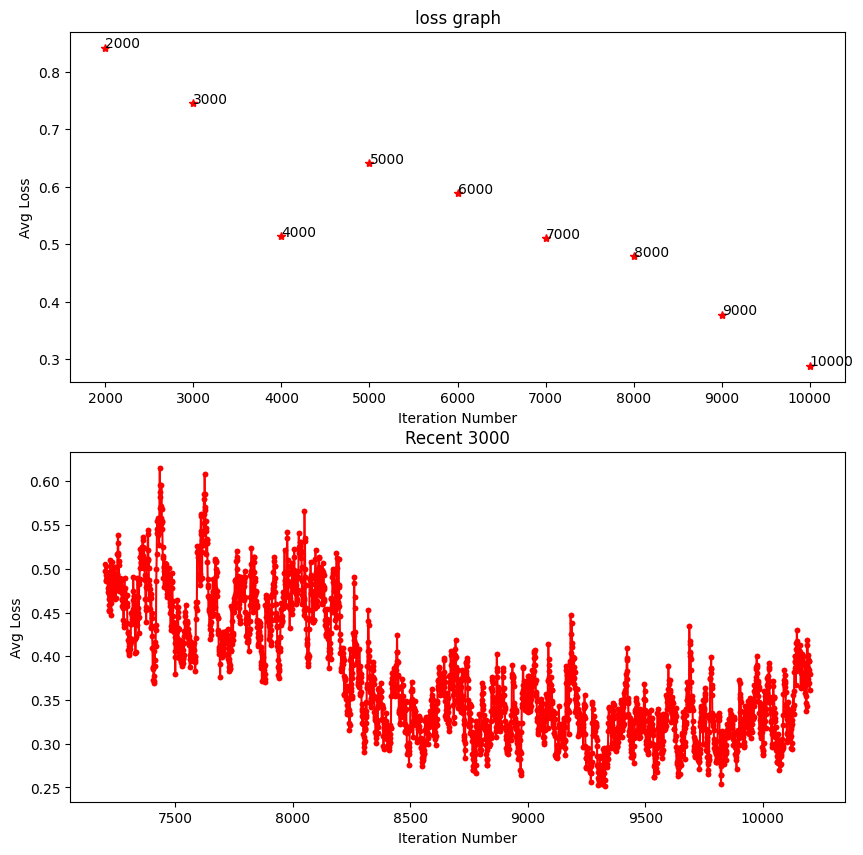

In [ ]:
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm

lines = []
for line in tqdm(open('/content/drive/MyDrive/yolov3/train_2.log')):
    if "avg" in line:
        lines.append(line)

iterations = []
avg_loss = []
line_cnt=len(lines)

for i in tqdm(range(line_cnt)):
    lineParts = lines[i].split(',')
    iterations.append(int(lineParts[0].split(':')[0]))
    avg_loss.append(float(lineParts[1].split()[0]))

fig ,ax  = plt.subplots(2,1 , figsize = (10,10))

#start = 0
start = 1999


for i in range(start, line_cnt, 1000):
    ax[0].plot(iterations[i:i+1], avg_loss[i:i+1], 'r*-')
    #print(iterations[i], avg_loss[i])
    ax[0].text(iterations[i], avg_loss[i],str(iterations[i]))

ax[0].set_xlabel('Iteration Number')
ax[0].set_ylabel('Avg Loss')
ax[0].set_title('loss graph')

for i in range(line_cnt-3000,line_cnt,):
    ax[1].plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-')

ax[1].set_xlabel('Iteration Number')
ax[1].set_ylabel('Avg Loss')
ax[1].set_title('Recent 3000')
fig.savefig('training_loss_plot2.png', dpi=1000)

35714it [00:00, 2172490.22it/s]
100%|██████████| 10200/10200 [00:00<00:00, 701181.71it/s]


Text(0.5, 1.0, 'Recent 3000')

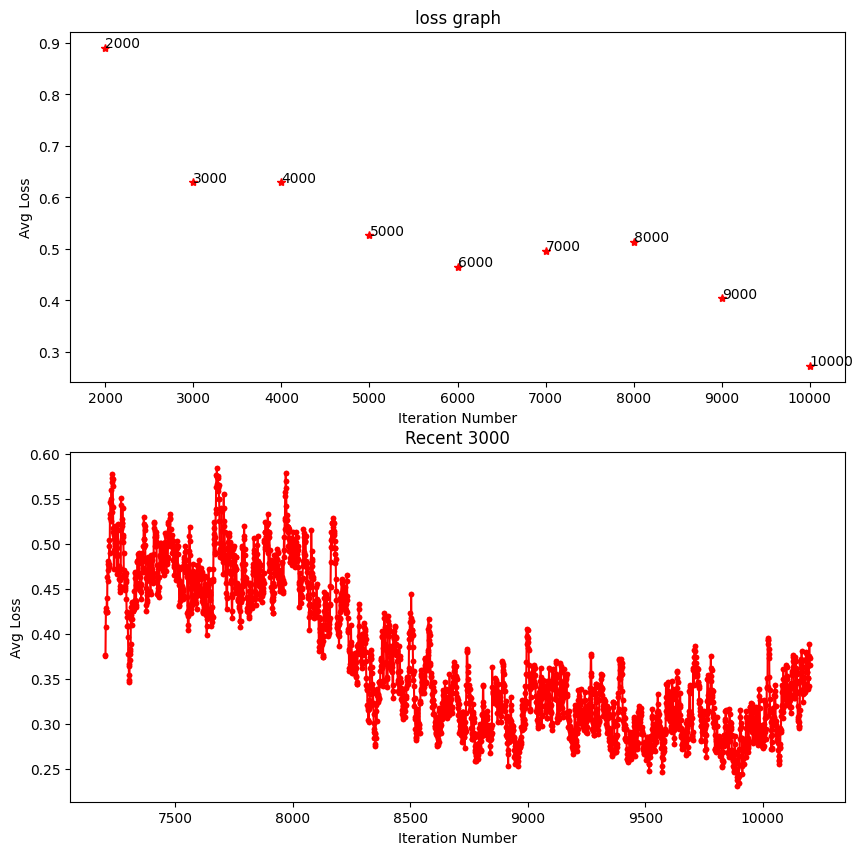

In [ ]:
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm

lines = []
for line in tqdm(open('/content/drive/MyDrive/yolov3/train_0.log')):
    if "avg" in line:
        lines.append(line)

iterations = []
avg_loss = []
line_cnt=len(lines)

for i in tqdm(range(line_cnt)):
    lineParts = lines[i].split(',')
    iterations.append(int(lineParts[0].split(':')[0]))
    avg_loss.append(float(lineParts[1].split()[0]))

fig ,ax  = plt.subplots(2,1 , figsize = (10,10))

#start = 0
start = 1999


for i in range(start, line_cnt, 1000):
    ax[0].plot(iterations[i:i+1], avg_loss[i:i+1], 'r*-')
    #print(iterations[i], avg_loss[i])
    ax[0].text(iterations[i], avg_loss[i],str(iterations[i]))

ax[0].set_xlabel('Iteration Number')
ax[0].set_ylabel('Avg Loss')
ax[0].set_title('loss graph')

for i in range(line_cnt-3000,line_cnt,):
    ax[1].plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-')

ax[1].set_xlabel('Iteration Number')
ax[1].set_ylabel('Avg Loss')
ax[1].set_title('Recent 3000')
fig.savefig('training_loss_plot1.png', dpi=1000)